In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


C:\Users\gugan\AppData\Local\Temp\ipykernel_15628\1230224523.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#loading the data set ,the dataset which is given to me is retail sales dataset i'm loading it using the pandas library

data = pd.read_csv(r"C:\Users\gugan\Desktop\Quinnel_soft\retail_sales.csv")

# Display the first few rows and the column names
print(data.head())
print(" ")
print('-----------------------')
print(" ")
print(data.columns)

          Date      Sales
0  1/1/15 0:00  54.048619
1  1/1/15 1:00  50.161596
2  1/1/15 2:00  55.954939
3  1/1/15 3:00  56.553261
4  1/1/15 4:00  60.487874
 
-----------------------
 
Index(['Date', 'Sales'], dtype='object')


In [3]:
data.columns = data.columns.str.strip()  
data['Date'] = pd.to_datetime(data['Date'], errors='coerce') 
data.set_index('Date', inplace=True)  

# Check the result
print(data.head())
print(data.info())

C:\Users\gugan\AppData\Local\Temp\ipykernel_15628\4105646762.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


                         Sales
Date                          
2015-01-01 00:00:00  54.048619
2015-01-01 01:00:00  50.161596
2015-01-01 02:00:00  55.954939
2015-01-01 03:00:00  56.553261
2015-01-01 04:00:00  60.487874
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52585 entries, 2015-01-01 00:00:00 to 2020-12-31 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   52585 non-null  float64
dtypes: float64(1)
memory usage: 821.6 KB
None


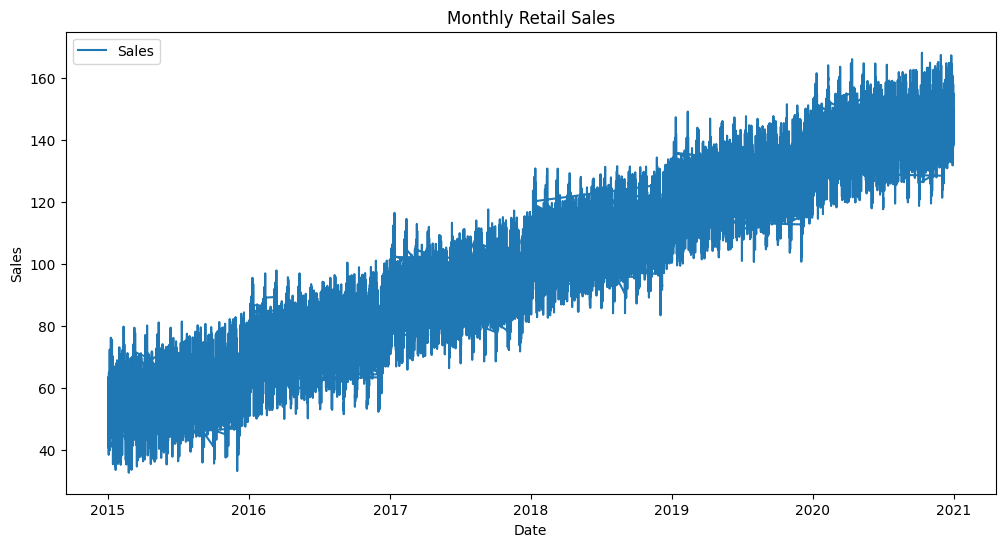

C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 250s 6ms/step - loss: 0.0013 - val_loss: 7.5362e-04
Epoch 2/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 328s 8ms/step - loss: 5.5948e-04 - val_loss: 0.0024
Epoch 3/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 243s 6ms/step - loss: 5.3944e-04 - val_loss: 5.2270e-04
Epoch 4/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 227s 5ms/step - loss: 5.1935e-04 - val_loss: 6.3060e-04
Epoch 5/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 220s 5ms/step - loss: 5.0358e-04 - val_loss: 0.0021
Epoch 6/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 249s 6ms/step - loss: 4.9100e-04 - val_loss: 5.3776e-04
Epoch 7/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 236s 6ms/step - loss: 4.8538e-04 - val_loss: 5.0184e-04
Epoch 8/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 235s 6ms/step - loss: 4.7651e-04 - val_loss: 6.3252e-04
Epoch 9/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 235s 6ms/step - loss: 4.7089e-04 - val_loss: 0.0021
Epoch 10/20
42057/42057 ━━━━━━━━━━━━━━━━━━━━ 235s 6ms/step - loss: 4.7374e-04 - val_loss: 7.1433e-04
Epoch 11/20
420

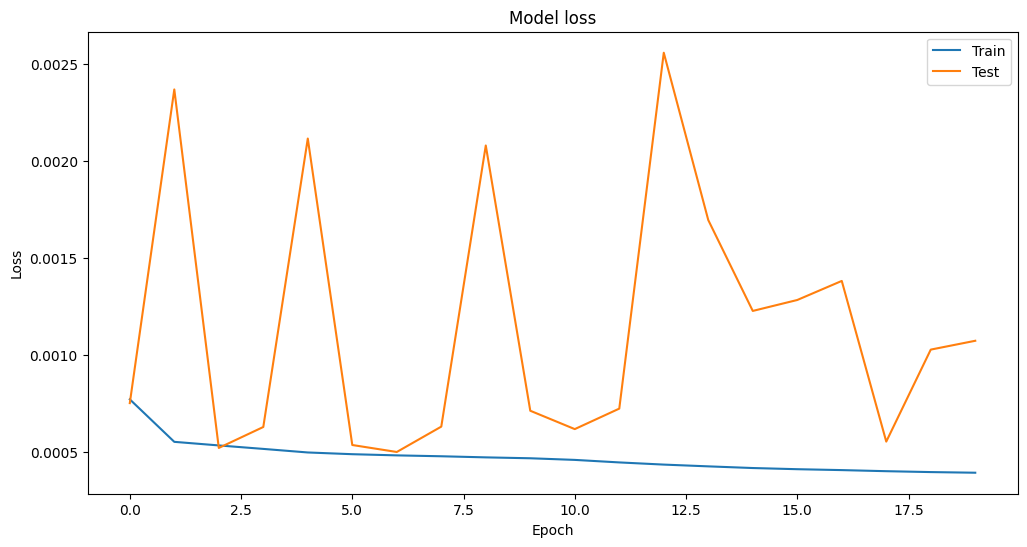

In [4]:
# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Sales')
plt.title('Monthly Retail Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Handle missing values
data = data.dropna()

# feature Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Sales'] = scaler.fit_transform(data['Sales'].values.reshape(-1,1))

# Preparing the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 12
X, Y = create_dataset(data.values, look_back)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, Y_train, batch_size=1, epochs=20, validation_data=(X_test, Y_test))

#save the model
model.save('retail_sales_forecasting_model.h5')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Train Score: RMSE=2.63, MAE=2.09, R2=0.99
Test Score: RMSE=4.44, MAE=3.57, R2=0.80


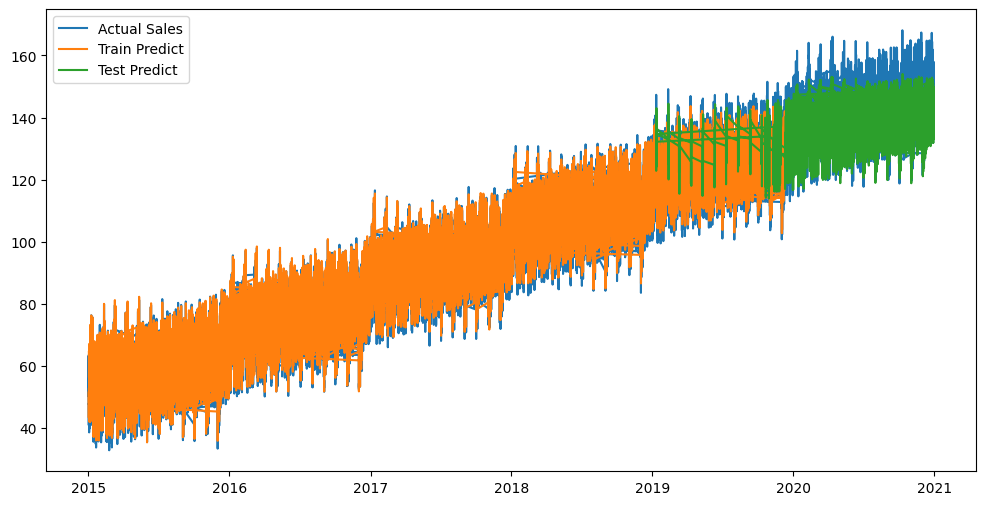

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


C:\Users\gugan\AppData\Local\Temp\ipykernel_15628\1078697490.py:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:]


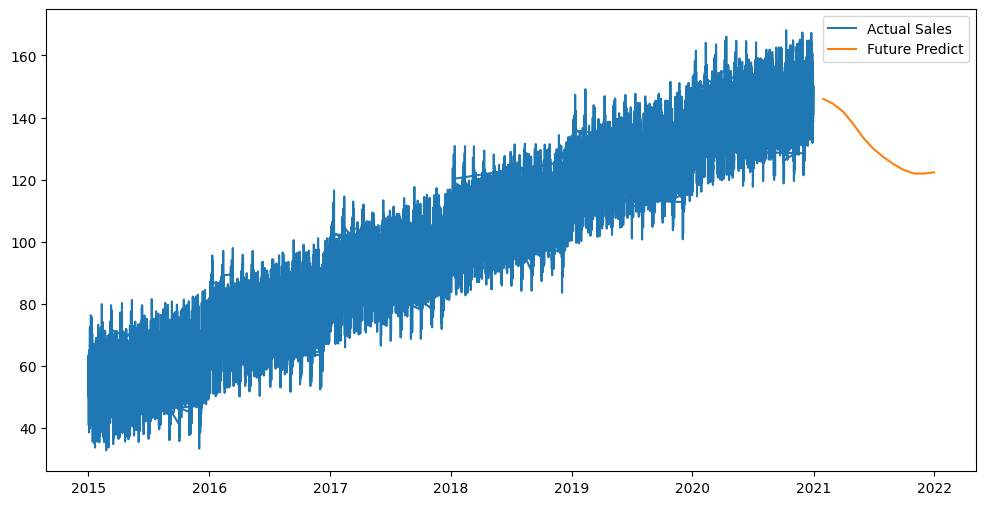

In [5]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate performance metrics
train_score_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_score_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))
train_score_mae = mean_absolute_error(Y_train, train_predict)
test_score_mae = mean_absolute_error(Y_test, test_predict)
train_score_r2 = r2_score(Y_train, train_predict)
test_score_r2 = r2_score(Y_test, test_predict)

print(f'Train Score: RMSE={train_score_rmse:.2f}, MAE={train_score_mae:.2f}, R2={train_score_r2:.2f}')
print(f'Test Score: RMSE={test_score_rmse:.2f}, MAE={test_score_mae:.2f}, R2={test_score_r2:.2f}')

# Plot the predictions
plt.figure(figsize=(12, 6))

# Plot actual sales
actual_sales = scaler.inverse_transform(data['Sales'].values.reshape(-1, 1))
plt.plot(data.index, actual_sales, label='Actual Sales')

# Plot training predictions
train_plot = np.empty_like(data['Sales'])
train_plot[:] = np.nan
train_plot[look_back:len(train_predict) + look_back] = train_predict[:, 0]
plt.plot(data.index, train_plot, label='Train Predict')

# Plot testing predictions
test_plot = np.empty_like(data['Sales'])
test_plot[:] = np.nan
test_start_idx = len(train_predict) + (look_back * 2) + 1
test_end_idx = test_start_idx + len(test_predict)

if test_end_idx <= len(test_plot):
    test_plot[test_start_idx:test_end_idx] = test_predict[:, 0]
else:
    test_plot[test_start_idx:len(test_plot)] = test_predict[:len(test_plot) - test_start_idx, 0]

plt.plot(data.index, test_plot, label='Test Predict')

plt.legend()
plt.show()

# Forecast future sales
future_steps = 12
last_values = data[-look_back:].values
future_predictions = []

for _ in range(future_steps):
    prediction = model.predict(last_values.reshape(1, look_back, 1))
    future_predictions.append(prediction[0, 0])
    last_values = np.append(last_values[1:], prediction[0, 0]).reshape(-1, 1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot future predictions
future_dates = pd.date_range(data.index[-1], periods=future_steps + 1, freq='M')[1:]
plt.figure(figsize=(12, 6))
plt.plot(data.index, actual_sales, label='Actual Sales')
plt.plot(future_dates, future_predictions, label='Future Predict')
plt.legend()
plt.show()
